In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#correlation coficients
corr=df.corr().round(2)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


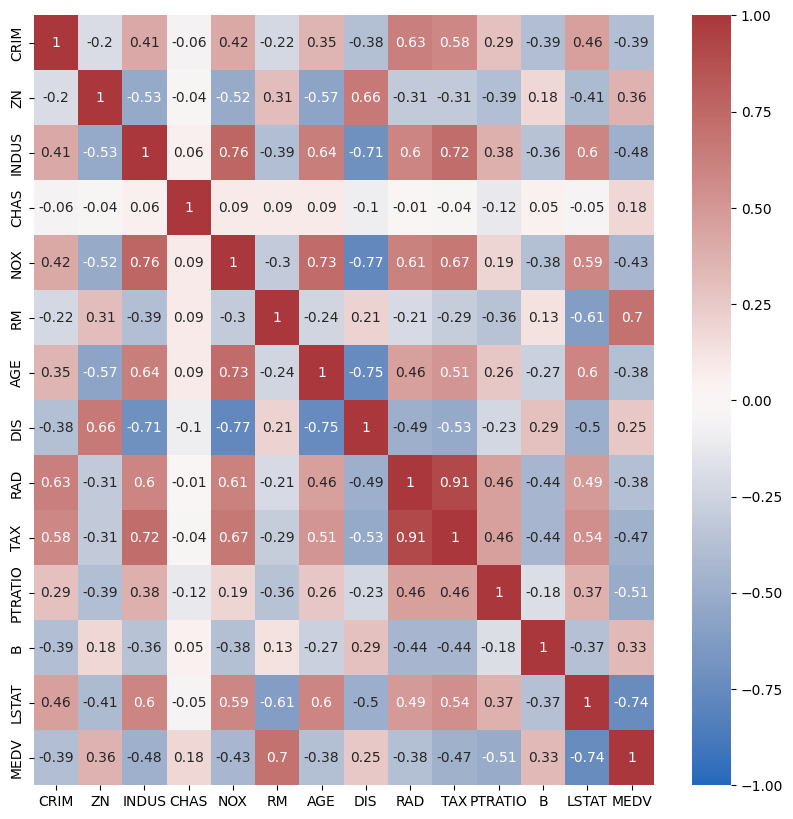

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,vmin=-1,vmax=1,center=0,annot=True,cmap='vlag')
plt.show()

In [11]:
abs(corr.MEDV)>0.5

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B          False
LSTAT       True
MEDV        True
Name: MEDV, dtype: bool

In [12]:
print(df.corr().abs().nlargest(3,'MEDV').index)

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


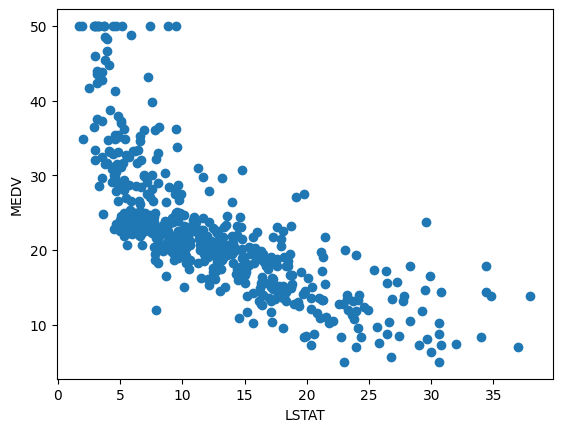

In [13]:
plt.scatter(x=df['LSTAT'],y=df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

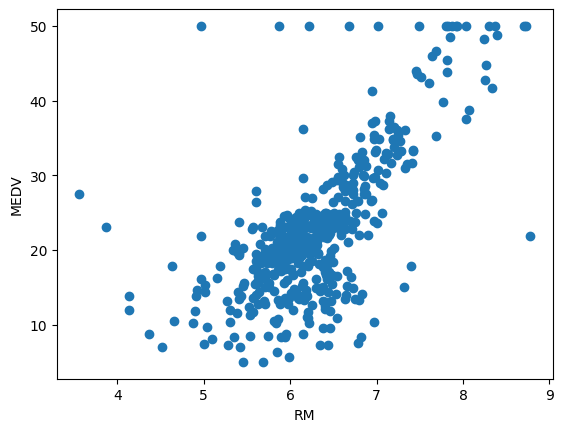

In [14]:
plt.scatter(x=df['RM'],y=df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

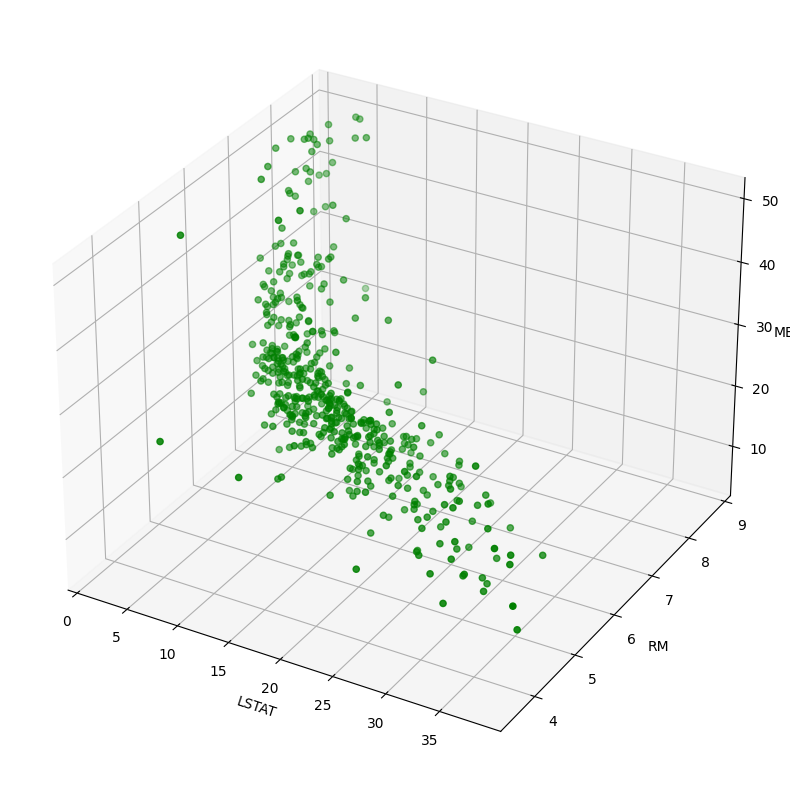

In [15]:
#3D scatterplot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['LSTAT'],df['RM'],df['MEDV'],c='green')
ax.set_xlabel('LSTAT')
ax.set_ylabel("RM")
ax.set_zlabel('MEDV')
plt.show()

In [16]:
#MODEL TRAINING
#X,Features
x=pd.DataFrame(np.c_[df['LSTAT'],df['RM']],columns=['LSTAT','RM'])
x

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [17]:
y=df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=5)

In [24]:
print(x_train.shape)
print(y_train.shape)

(379, 2)
(379,)


In [25]:
print(x_test.shape)
print(y_test.shape)

(127, 2)
(127,)


In [28]:
from sklearn.linear_model import LinearRegression

housing_model=LinearRegression()
housing_model.fit(x_train,y_train)

LinearRegression()

In [32]:
print(housing_model.coef_)
print(housing_model.intercept_)

[-0.67758923  4.91580979]
0.185822156236096


In [38]:
predict=housing_model.predict(x_test)
print('R_squared %.4f' % housing_model.score(x_test,y_test))

R_squared 0.6294


**visualize error**

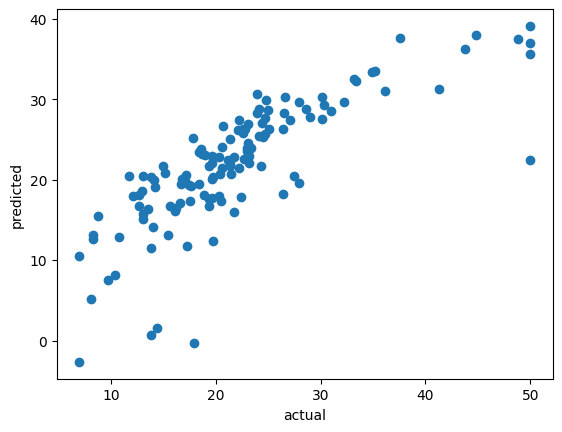

In [41]:
plt.scatter(x=y_test,y=predict)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

**MEAN SQUARED ERROR**

In [43]:
from sklearn.metrics import mean_squared_error as ms
MSE=ms(y_test,predict)
print(MSE)

30.592662694483906
